Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import adam_v2
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
main_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(main_path + "/Train")
data_dir_test = pathlib.Path(main_path + "/Test")
# to make sure you have a correct path name
print("data_dir_train: ", data_dir_train, "\ndata_dir_test: ", data_dir_test)

data_dir_train:  /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train 
data_dir_test:  /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
# Train Dataset created here:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Validation Dataset created here:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Test set for creating one batch
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

Found 118 files belonging to 9 classes.


In [9]:
type(test_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [10]:
# Listing out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data of Model one
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

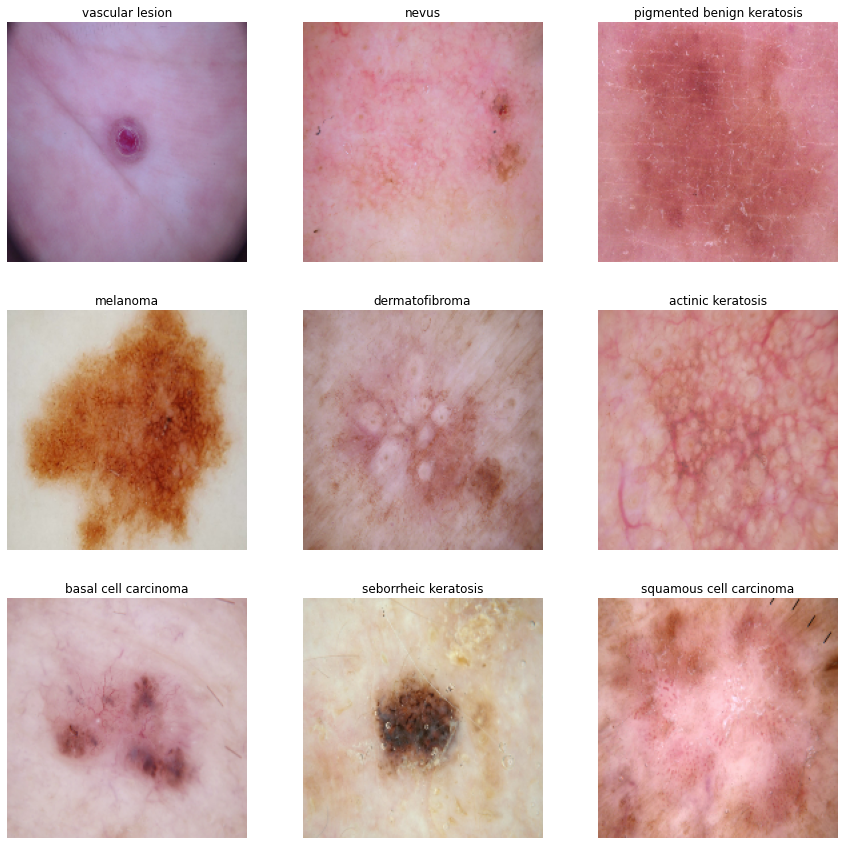

In [11]:
# Training / Validation data to visualize
plt.figure(figsize=(15, 15))
visited = []
visited_all = False
j = 0

for image, label in train_ds.take(50):
  if visited_all:
    break
  for i in range(len(class_names)):
    if len(visited) == 9:
      visited_all = True
      break
    if class_names[label[i]] in visited:
      continue
    else:
      ax = plt.subplot(3, 3, j+1)
      j+=1
      plt.imshow(image[i].numpy().astype('uint8'))
      plt.title(class_names[label[i]])
      plt.axis('off')
      visited.append(class_names[label[i]])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
print(type(train_ds), "\n", type(test_ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> 
 <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

## Model 1:

In [14]:
# Creating a CNN model, which can accurately detect 9 classes present in the dataset
def model_one():
  # create model
  model = Sequential()
  model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
# Model One created
model_one = model_one()

In [16]:
# View the summary of all layers
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 89, 89, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        9248      
                                                        

In [17]:
# Compling the Model
model_one.compile(adam_v2.Adam(learning_rate = 0.0005), loss='SparseCategoricalCrossentropy', metrics=['accuracy', 'mse'])

### Train the Model One

In [18]:
epochs = 20
history_one = model_one.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 235s 1s/step - loss: 2.0074 - accuracy: 0.2282 - mse: 18.0844 - val_loss: 1.9827 - val_accuracy: 0.2282 - val_mse: 18.4629
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 1.7923 - accuracy: 0.3493 - mse: 18.0910 - val_loss: 1.5654 - val_accuracy: 0.4631 - val_mse: 18.4682
Epoch 3/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5410 - accuracy: 0.4425 - mse: 18.1002 - val_loss: 1.4311 - val_accuracy: 0.4877 - val_mse: 18.4756
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 1.4577 - accuracy: 0.5050 - mse: 18.1040 - val_loss: 1.4713 - val_accuracy: 0.4922 - val_mse: 18.4737
Epoch 5/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3800 - accuracy: 0.5218 - mse: 18.1078 - val_loss: 1.5676 - val_accuracy: 0.4564 - val_mse: 18.4753
Epoch 6/20
56/56 [==============================] - 3s 51ms/step - loss: 1.3267 - accuracy: 0.5312 - mse: 18.1087 - val_loss:

### Training Results : Model One

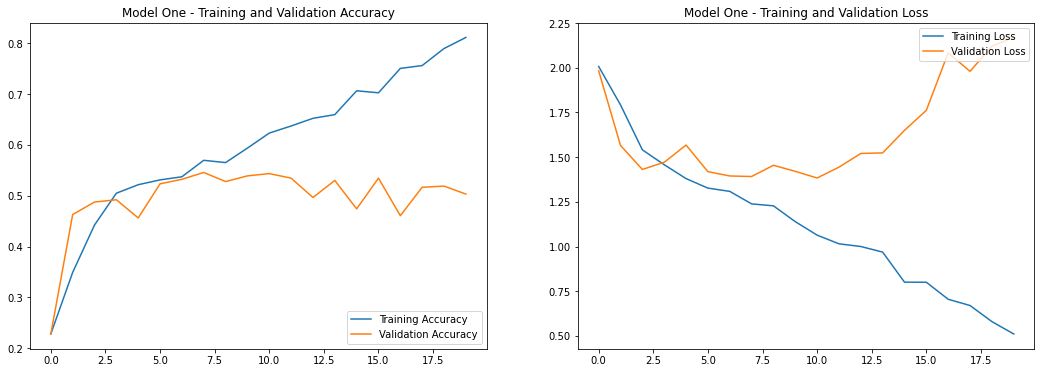

In [19]:
history= history_one
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model One - Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model One - Training and Validation Loss')
plt.show()

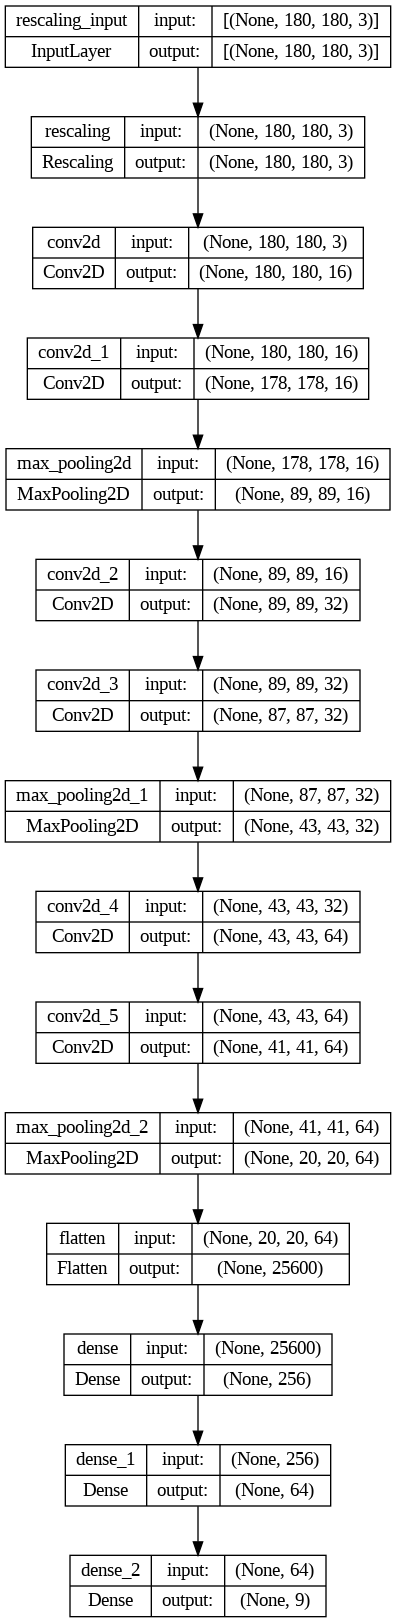

In [20]:
# Plotting the Model layer
plot_model(model_one, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
print("Final Train Loss And Accuracy")
score1_train = model_one.evaluate(train_ds, verbose=1)
print("Validation Loss And Accuracy")
score1_val = model_one.evaluate(val_ds, verbose=1)
print("Test Loss And Accuracy")
score1_test = model_one.evaluate(test_ds)

Final Train Loss And Accuracy
56/56 [==============================] - 1s 20ms/step - loss: 0.3666 - accuracy: 0.8694 - mse: 18.1497
Validation Loss And Accuracy
14/14 [==============================] - 0s 19ms/step - loss: 2.1697 - accuracy: 0.5034 - mse: 18.5116
Test Loss And Accuracy
1/1 [==============================] - 21s 21s/step - loss: 4.0811 - accuracy: 0.3898 - mse: 15.9697


#### Observation - Model One :
- We have found that after reaching the seventh epoch, the model starts overfitting
- And we have also observed that the training accuracy significantly increases and the test decreases

### We didnt add Dropout and BatchNormalization() 
**Here we can clearly see that:**
- Final Train Accuracy = 0.8694
- Validation Accuracy = 0.5034
- Test Accuracy = 0.3898

## Model 2: BatchNormalization() And Dropout()

In [22]:
# creating Model number Two with BatchNormalization() And Dropout()
def model_two():
  model = Sequential()
  model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.30))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.40))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.30))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.30))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [23]:
# Crteated Model Two
model_two = model_two()

In [24]:
# Summary of all the Layers of Model Two
model_two.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 178, 178, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)      

### Compiling the model Two

In [25]:
# Compiling the model Two
model_two.compile(adam_v2.Adam(learning_rate = 0.0001), loss='SparseCategoricalCrossentropy', metrics=['accuracy', 'mse'])

### Training the model

In [26]:
epochs = 20
history_two = model_two.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 81ms/step - loss: 2.6514 - accuracy: 0.1881 - mse: 18.0994 - val_loss: 2.6376 - val_accuracy: 0.0403 - val_mse: 18.4557
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 2.0720 - accuracy: 0.2355 - mse: 18.0892 - val_loss: 2.9612 - val_accuracy: 0.0403 - val_mse: 18.4608
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 1.9737 - accuracy: 0.2874 - mse: 18.0898 - val_loss: 3.6215 - val_accuracy: 0.1499 - val_mse: 18.4777
Epoch 4/20
56/56 [==============================] - 4s 65ms/step - loss: 1.9450 - accuracy: 0.3248 - mse: 18.0923 - val_loss: 4.1494 - val_accuracy: 0.1723 - val_mse: 18.4836
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 1.9018 - accuracy: 0.3465 - mse: 18.0936 - val_loss: 4.7322 - val_accuracy: 0.2461 - val_mse: 18.4874
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.8489 - accuracy: 0.3477 - mse: 18.0948 - val_loss:

### Results Model Two

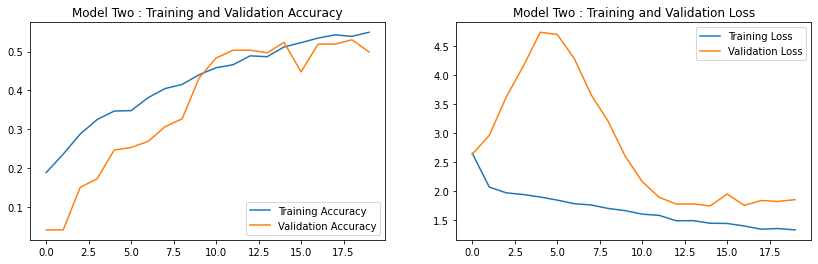

In [27]:
history = history_two
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Two : Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Two : Training and Validation Loss')
plt.show()

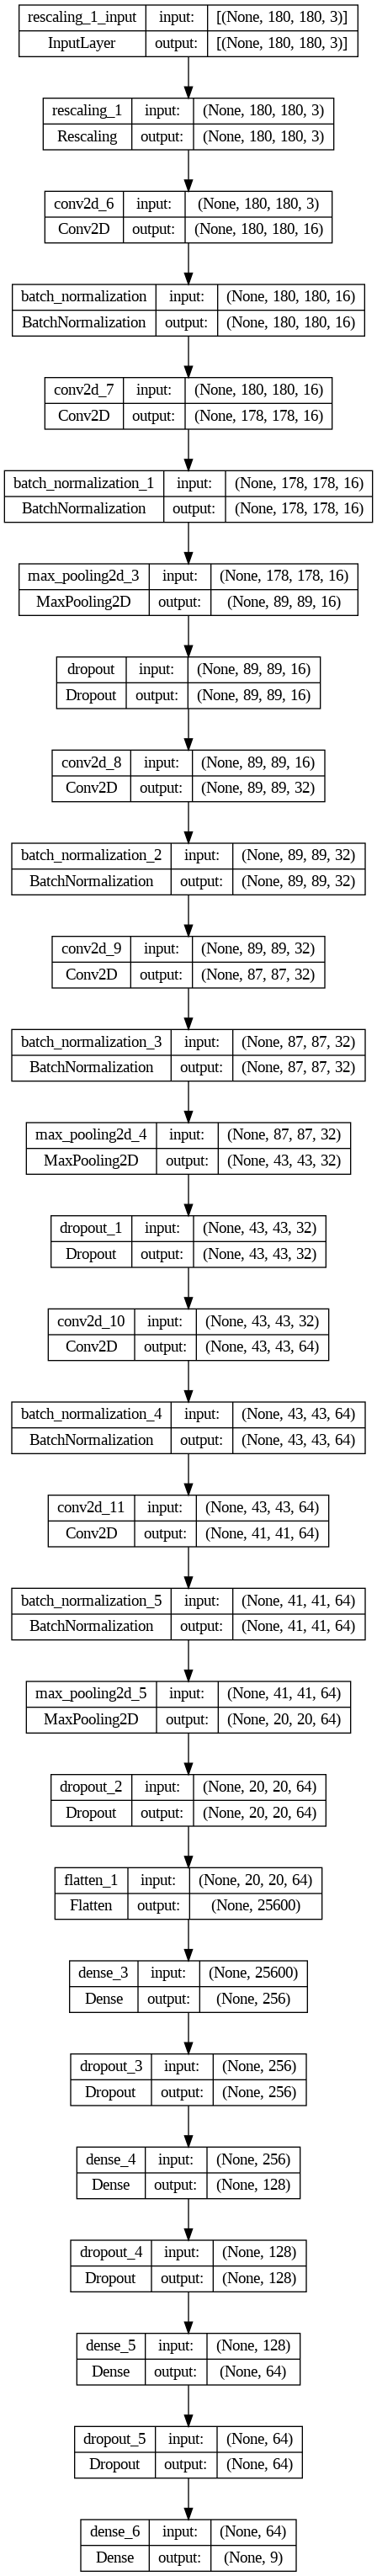

In [28]:
# Plotted the Model Layers of model_two 
plot_model(model_two, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
print("Final Train Loss And Accuracy")
score1_train = model_two.evaluate(train_ds, verbose=1)
print("Validation Loss And Accuracy")
score1_val = model_two.evaluate(val_ds, verbose=1)
print("Test Loss And Accuracy")
score1_test = model_two.evaluate(test_ds)

Final Train Loss And Accuracy
56/56 [==============================] - 1s 17ms/step - loss: 1.4070 - accuracy: 0.5792 - mse: 18.1358
Validation Loss And Accuracy
14/14 [==============================] - 0s 17ms/step - loss: 1.8574 - accuracy: 0.4989 - mse: 18.5061
Test Loss And Accuracy
1/1 [==============================] - 5s 5s/step - loss: 3.0652 - accuracy: 0.3559 - mse: 15.9743


#### It looks like the model is good but the accuracy is really low

### The reason is we do not have huge variety of data and we have less data. So, we should augment the dataset.

**Observation:**
- Final Train Accuracy = 0.5792 
- Validation accuracy = 0.4989
- Test Accuracy = 0.3559

#### We will the augment the images in the next Model and observe that how much it can improve.

## Model 3: Data Augmenting

In [30]:
# Keras Augment Varaiable
kears_aug_data = Sequential([
                      layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height,img_width,3)),
                      layers.experimental.preprocessing.RandomRotation(factor=0.2, fill_mode='reflect'),
                      layers.experimental.preprocessing.RandomZoom(height_factor=(0.3, 0.3), width_factor=(0.3, 0.3), fill_mode='reflect')
])

## Augumentation Data


['vascular lesion', 'melanoma', 'actinic keratosis', 'nevus', 'basal cell carcinoma', 'pigmented benign keratosis', 'squamous cell carcinoma', 'seborrheic keratosis', 'dermatofibroma']


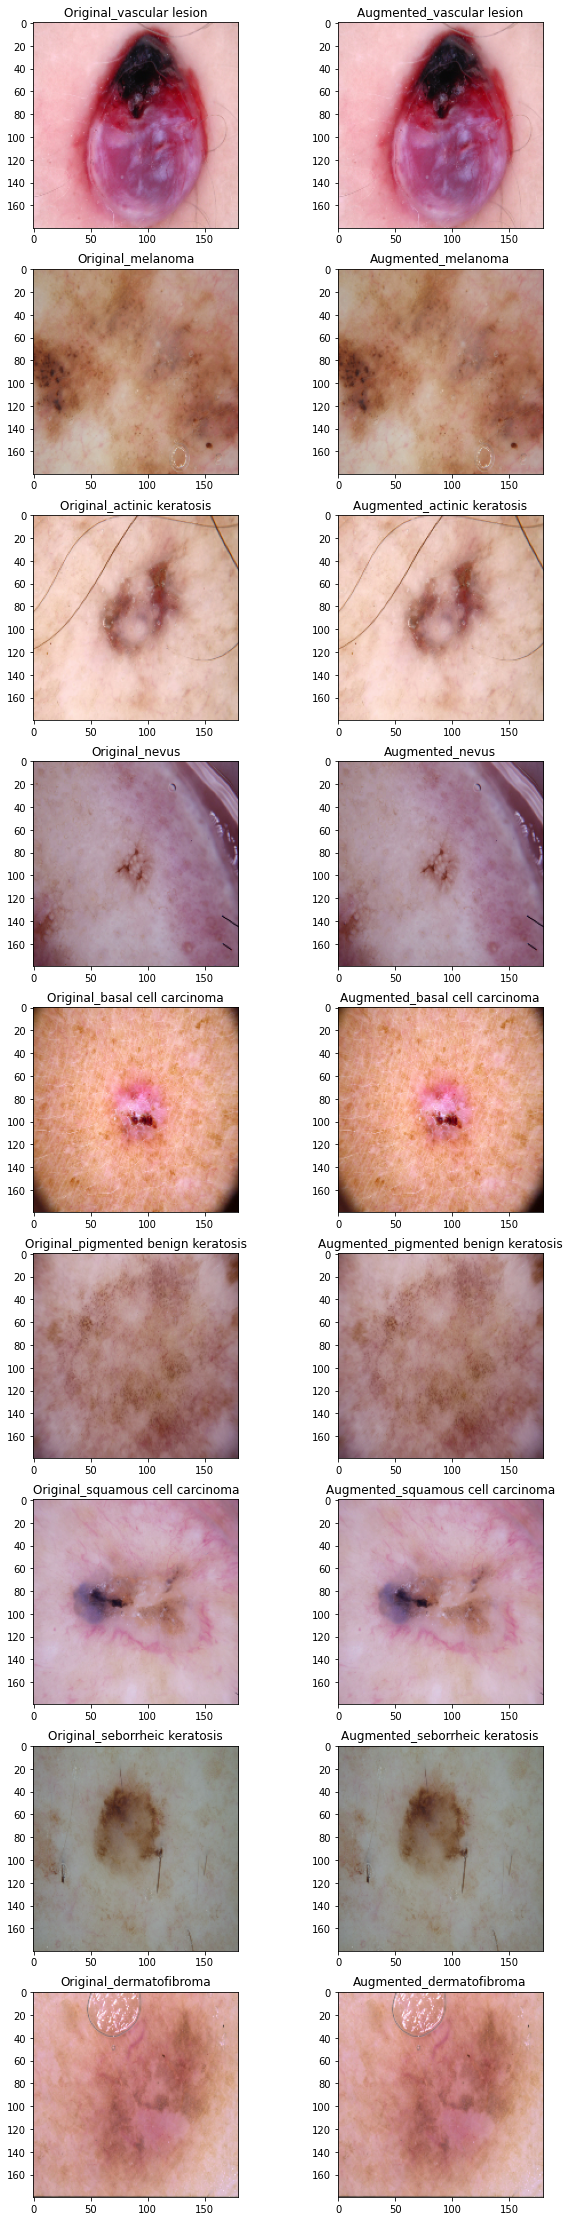

In [31]:
visited = []
visited_all = False
plot_idx = 0
num_classes = len(class_names)
plt.figure(figsize=(10,40))

for image, label in train_ds.take(20):
  if visited_all:
    print(visited)
    break
  for i in range(num_classes):
    if len(visited) == num_classes:
      visited_all = True
      break

    if class_names[label[i]] in visited:
      continue
    else:
      plt.subplot(num_classes,2,plot_idx+1)
      plt.imshow(image[i].numpy().astype("uint8"))
      plt.title("Original_"+class_names[label[i]])
      plot_idx+=1

      plt.subplot(num_classes,2,plot_idx+1)
      aug_img=kears_aug_data(image)
      plt.imshow(aug_img[i].numpy().astype("uint8"))
      plt.title("Augmented_"+class_names[label[i]])
      plot_idx+=1

      visited.append(class_names[label[i]])

**We found that each image is augmented:**
- The left is the original
- The right is the augmented image

## Model 3

In [32]:
def model_three():
  model = Sequential()
  model.add(kears_aug_data)
  model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.30))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.40))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.30))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.30))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [33]:
# Model Three Created
model_three = model_three()

In [34]:
# Summary of all the layers in Model Three
model_three.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 16)      2320      
                                                                 
 batch_normalization_7 (Batc  (None, 178, 178, 16)     64        
 hNormalization)                                      

In [35]:
# Compiling Model Three
model_three.compile(adam_v2.Adam(learning_rate = 0.0001), loss='SparseCategoricalCrossentropy', metrics=['accuracy', 'mse'])

## Traing the Model Three

In [36]:
epochs = 20
history_three = model_three.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 89ms/step - loss: 2.8229 - accuracy: 0.1417 - mse: 18.0995 - val_loss: 2.5967 - val_accuracy: 0.0872 - val_mse: 18.4561
Epoch 2/20
56/56 [==============================] - 5s 84ms/step - loss: 2.1842 - accuracy: 0.1791 - mse: 18.0875 - val_loss: 2.7748 - val_accuracy: 0.0872 - val_mse: 18.4605
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0824 - accuracy: 0.1953 - mse: 18.0862 - val_loss: 2.5646 - val_accuracy: 0.1342 - val_mse: 18.4585
Epoch 4/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0154 - accuracy: 0.2333 - mse: 18.0885 - val_loss: 2.5667 - val_accuracy: 0.1342 - val_mse: 18.4617
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.9734 - accuracy: 0.2439 - mse: 18.0891 - val_loss: 2.4597 - val_accuracy: 0.1432 - val_mse: 18.4626
Epoch 6/20
56/56 [==============================] - 5s 86ms/step - loss: 1.9391 - accuracy: 0.2790 - mse: 18.0903 - val_loss:

## Training Results : Model Three

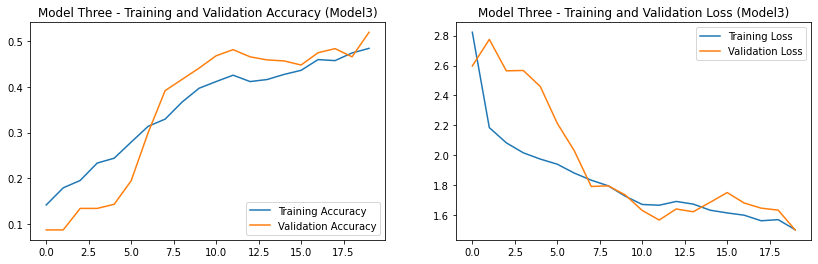

In [37]:
history = history_three
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Three - Training and Validation Accuracy (Model3)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Three - Training and Validation Loss (Model3)')
plt.show()

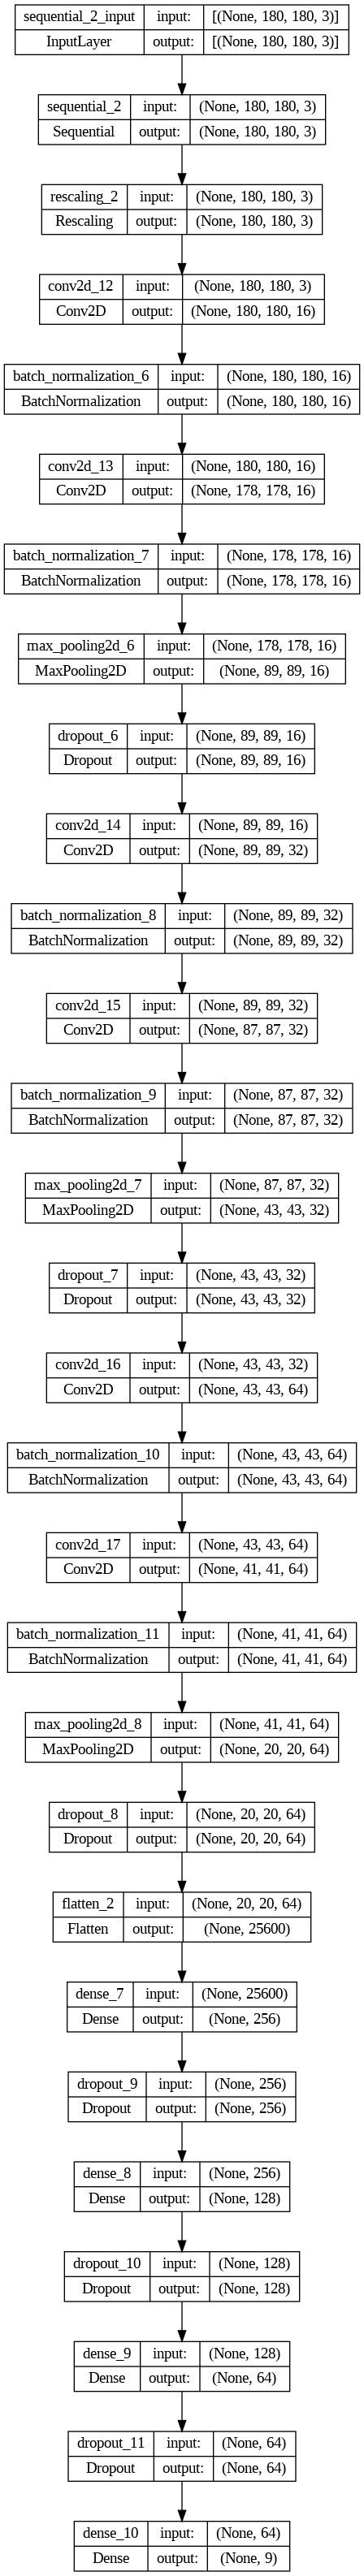

In [38]:
# Plotting the model layers from Model Three
plot_model(model_three, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
print("Final Train Loss And Accuracy")
score1_train = model_three.evaluate(train_ds, verbose=1)
print("Validation Loss And Accuracy")
score1_val = model_three.evaluate(val_ds, verbose=1)
print("Test Loss And Accuracy")
score1_test = model_three.evaluate(test_ds)

Final Train Loss And Accuracy
56/56 [==============================] - 1s 17ms/step - loss: 1.3784 - accuracy: 0.5357 - mse: 18.1156
Validation Loss And Accuracy
14/14 [==============================] - 0s 17ms/step - loss: 1.4990 - accuracy: 0.5190 - mse: 18.4865
Test Loss And Accuracy
1/1 [==============================] - 3s 3s/step - loss: 2.3062 - accuracy: 0.3475 - mse: 15.9575


#### Model is looking better and overfitting get resolved. And the accuracy looks like really low.

#### Since we do not have huge variet of data due to to that accuracy is low. Therefore, we have to create more samples for each class to make it less imbalance.

**Our Observation:**
- Final Train Accuracy = 0.5357  
- Validation Accuracy = 0.5190 
- Test Accuracy = 0.3475

### In the Model number three we got better result by using Augumentation and preprocessing of the images. 

# **Finding the Distribution of Classes in the Training Dataset**

In [40]:
class_count = []
for i in class_names:
  class_path = pathlib.Path(main_path + "/Train" + "/"+  i)
  count = len(list(class_path.glob('*.jpg')))
  class_count.append(count)

print(class_names, "\n", class_count)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 
 [114, 376, 95, 438, 357, 462, 77, 181, 139]


In [41]:
class_data = {"Class Names" : class_names, "Class Count" : class_count}
df_class = pd.DataFrame(class_data)
print(df_class)

                  Class Names  Class Count
0           actinic keratosis          114
1        basal cell carcinoma          376
2              dermatofibroma           95
3                    melanoma          438
4                       nevus          357
5  pigmented benign keratosis          462
6        seborrheic keratosis           77
7     squamous cell carcinoma          181
8             vascular lesion          139


## Plotting each class counts using bar graph.

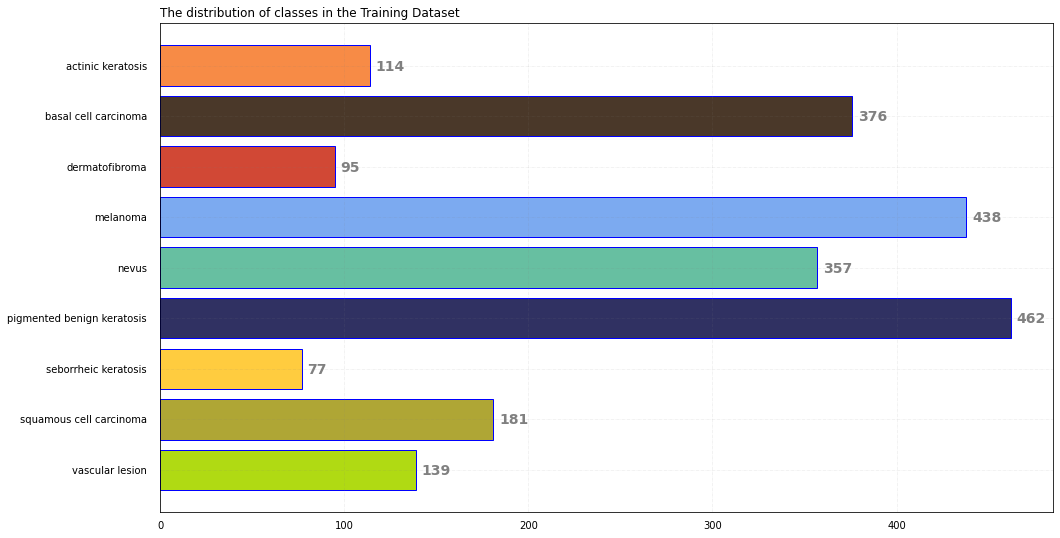

In [42]:
class_colour = ["#f78b46", "#4a3829","#d14835","#7caaf0", "#67bfa1", "#303162", "#ffcc3f", "#afa635", "#b0da13"]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(class_names, class_count, color = class_colour, edgecolor='blue')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(True)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+3, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('The distribution of classes in the Training Dataset',
             loc ='left', )
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': 25,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': 25*0.75,
          'axes.titlepad': 15}
plt.rcParams.update(params)

# Show Plot
plt.show()

### Observations:
- Basal cell carcinoma(95) and Seborrheic keratosis(77) have the least samples.
- Pigmented benign keratosis(462) and Melanoma(438) have the most samples.
- Actinic keratosis(114), Squamous cell carcinoma(181), Vascular lesion(139), Basal cell carcinoma(95), and Seborrheic keratosis(77) have samples less than 40% compared to most samples classes( Pigmented benign keratosis-462). 

#### We are getting lousy accuracy and model being biased towards the most sample classes because of imbalance in the classes

- Therefore, we have to rectify the class imbalance
- Add some more images in order to get better accuracy

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
class_count = []

for i in class_names:
  class_path = pathlib.Path(main_path + "/Train" + "/"+  i)
  count = len(list(class_path.glob('*/*.jpg')))
  class_count.append(count)

print(class_names, "\n", class_count)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
class_data = {"Class Names" : class_names, "Class Count" : class_count}
df_class = pd.DataFrame(class_data)
print(df_class)

                  Class Names  Class Count
0           actinic keratosis            0
1        basal cell carcinoma            0
2              dermatofibroma            0
3                    melanoma            0
4                       nevus            0
5  pigmented benign keratosis            0
6        seborrheic keratosis            0
7     squamous cell carcinoma            0
8             vascular lesion            0


We noticed that we have added 500 images to all the classes to maintain some class balance

In [46]:
class_count = []

for i in class_names:
  class_path = pathlib.Path(main_path + "/Train" + "/"+  i)
  count = len(list(class_path.glob('**/*.jpg')))
  class_count.append(count)

print(class_names, "\n", class_count)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 
 [114, 376, 95, 438, 357, 462, 77, 181, 139]


In [47]:
class_data = {"Class Names" : class_names, "Class Count" : class_count}
df_class = pd.DataFrame(class_data)
print(df_class)

                  Class Names  Class Count
0           actinic keratosis          114
1        basal cell carcinoma          376
2              dermatofibroma           95
3                    melanoma          438
4                       nevus          357
5  pigmented benign keratosis          462
6        seborrheic keratosis           77
7     squamous cell carcinoma          181
8             vascular lesion          139


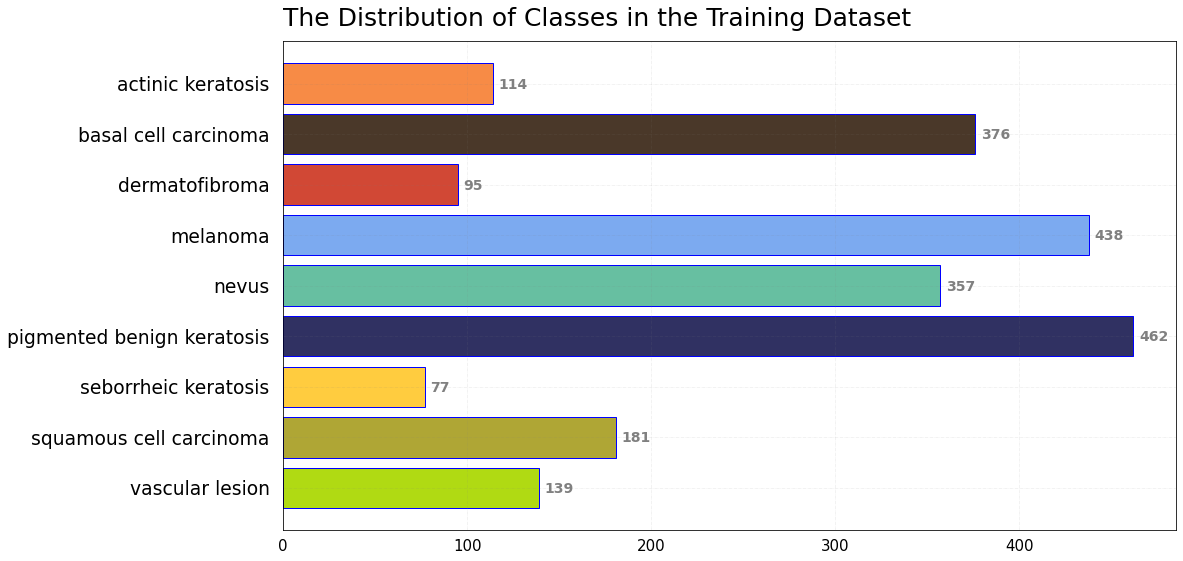

In [48]:
class_colour = ["#f78b46", "#4a3829","#d14835","#7caaf0", "#67bfa1", "#303162", "#ffcc3f", "#afa635", "#b0da13"]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(class_names, class_count, color = class_colour, edgecolor='blue')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(True)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+3, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('The Distribution of Classes in the Training Dataset',
             loc ='left', )
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': 25,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': 25*0.75,
          'axes.titlepad': 15}
plt.rcParams.update(params)


# Show Plot
plt.show()

## Classes are not too imbalanced &  we can able to move with this sample counts for each class. And the ratio of imbalance is not high

#### Train the model on the data created using Augmentor

In [49]:
## Image Path
main_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration"

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [51]:
data_dir_train_new = pathlib.Path(main_path + "/Train")

# data_dir_train_new= data_dir_train.glob('*/output/*.jpg')
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


#### Create a validation dataset

In [52]:
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [53]:
## Test Set
data_dir_test_new = pathlib.Path(main_path + "/Test")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test_new,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

Found 118 files belonging to 9 classes.


In [54]:
class_names = train_ds_new.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Model 4:

In [55]:
def model_four():
  # create model
  model = Sequential()
  model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.40))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.30))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [56]:
### Final Model Created
model_four = model_four()

In [57]:
# Summary of All Layers in Model Number Four
model_four.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 batch_normalization_13 (Bat  (None, 180, 180, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)      

#### Compilin the Model Number Four

In [58]:
model_four.compile(adam_v2.Adam(learning_rate = 0.0001), loss='SparseCategoricalCrossentropy', metrics=['accuracy', 'mse'])

#### Train Model Four

In [59]:
epochs = 50
history_four = model_four.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/50
56/56 [==============================] - 19s 271ms/step - loss: 2.6325 - accuracy: 0.1830 - mse: 18.0968 - val_loss: 2.2769 - val_accuracy: 0.0425 - val_mse: 18.4524
Epoch 2/50
56/56 [==============================] - 16s 249ms/step - loss: 2.1681 - accuracy: 0.2355 - mse: 18.0888 - val_loss: 2.3720 - val_accuracy: 0.1499 - val_mse: 18.4572
Epoch 3/50
56/56 [==============================] - 17s 281ms/step - loss: 1.9910 - accuracy: 0.2902 - mse: 18.0923 - val_loss: 2.8112 - val_accuracy: 0.1499 - val_mse: 18.4724
Epoch 4/50
56/56 [==============================] - 16s 252ms/step - loss: 1.9177 - accuracy: 0.3432 - mse: 18.0948 - val_loss: 2.9165 - val_accuracy: 0.1544 - val_mse: 18.4774
Epoch 5/50
56/56 [==============================] - 16s 251ms/step - loss: 1.8673 - accuracy: 0.3610 - mse: 18.0964 - val_loss: 3.1928 - val_accuracy: 0.1499 - val_mse: 18.4936
Epoch 6/50
56/56 [==============================] - 16s 253ms/step - loss: 1.7030 - accuracy: 0.4068 - mse: 18.1015

#### **Todo:**  Visualize the model results

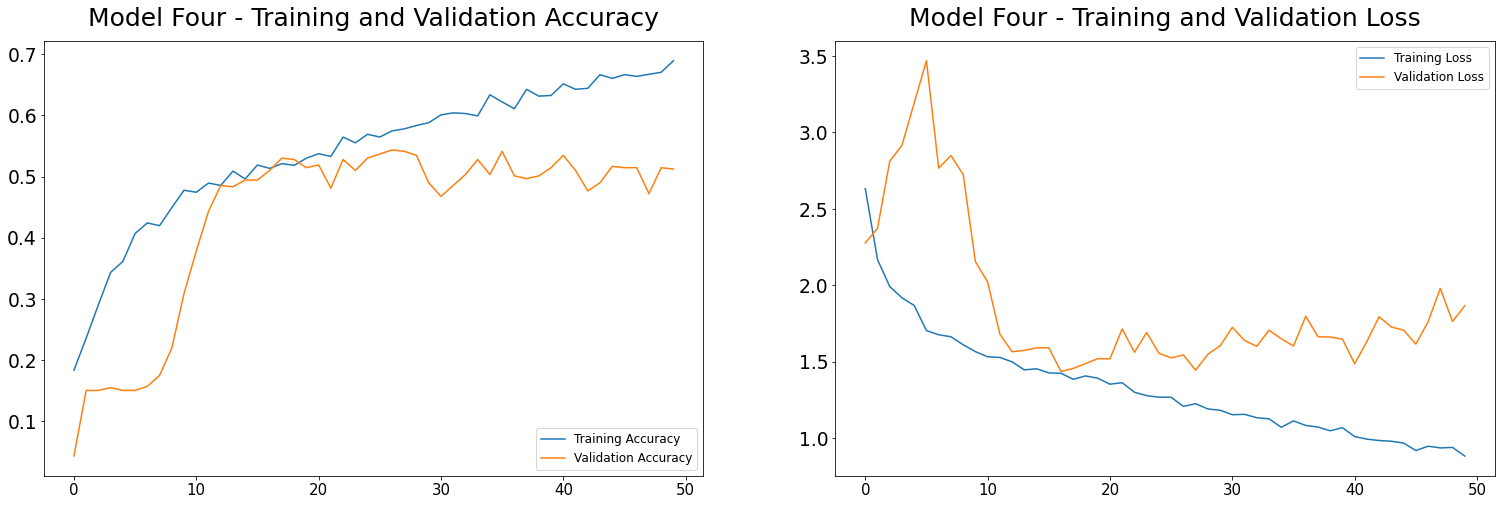

In [60]:
history=history_four
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(26, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Four - Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Four - Training and Validation Loss')
plt.show()

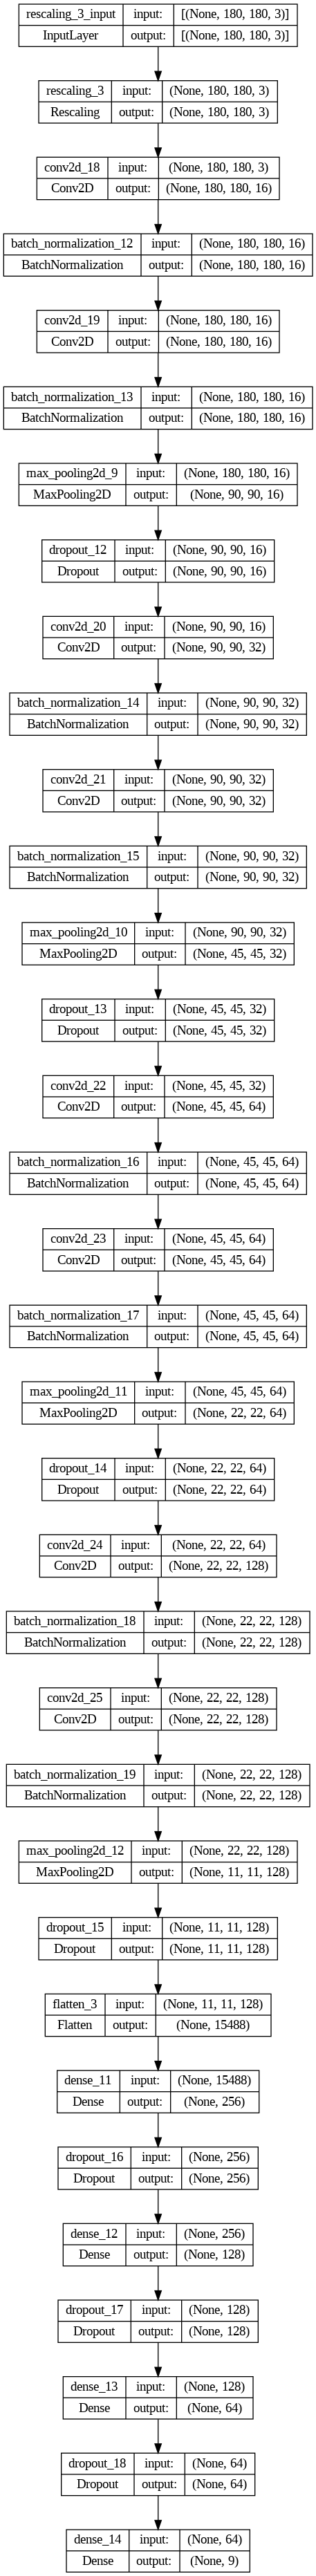

In [61]:
plot_model(model_four, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [62]:
print("Final Train Loss And Accuracy")
score1_train = model_four.evaluate(train_ds_new, verbose=1)
print("Validation Loss And Accuracy")
score1_val = model_four.evaluate(val_ds_new, verbose=1)
print("Test Loss And Accuracy")
score1_test = model_four.evaluate(test_ds)

Final Train Loss And Accuracy
56/56 [==============================] - 13s 203ms/step - loss: 1.1673 - accuracy: 0.6150 - mse: 18.1439
Validation Loss And Accuracy
14/14 [==============================] - 3s 86ms/step - loss: 1.8659 - accuracy: 0.5123 - mse: 18.5164
Test Loss And Accuracy
1/1 [==============================] - 5s 5s/step - loss: 2.9326 - accuracy: 0.3644 - mse: 15.9784


#### The model looks better and even the accuracy is perfect and model did not overfit

#### We can still improve the accuracy, but we need more data. As of now, we have really less data, and even we can augment more data. Here we created only 500 images for each class; in the future, we can create more like 1.5k+.

**Final Observation about Model Accuracy:**
- Final Train Accuracy = 0.6150
- Validation Accuracy = 0.5123
- Test Accuracy = 0.3644

#### What we have observed till now is that by using:
- Augmentation
- Rebalance
- Dropout
- Batch norm 

Helped to reduce the Overfitting and improved the model accuracy
